### Student Name: Ali Asghar Yousuf
### Student ID: ay06993
### Student Email: ay06993@st.habib.edu.pk

### Goal

Another area where data science and machine learning play a huge role is in choosing if granting a loan. This is a particularly hot field as many start-ups feel that bank loan models can
be improved. Therefore, there is space to come up with better loan strategies that can benefit both the lender and the borrower.

In this challenge, you will have access to loan data from a bank and will have to improve their model.

### Datasets

The 2 datsets are:<br>
__Loan Data__ - general information about the Loan
Columns:
- loan_id : the id of the loan. Unique by loan. Can be joined to loan id in the other table
- loan_purpose : the reason for asking the loan: investment, business, emergency_funds, home, other,
- date : when the loan was asked
- loan_granted : whether the loan was granted
- loan_repaid : whether the loan was repaid. NA means that the loan was not granted

__Borrower Data__ - information about the borrower
Columns:
- loan_id : the id of the the loan. Unique by loan. Can be joined to loan id in the other table
- is_first_loan : did she ask for any other loans in her lifetime?
- fully_repaid_previous_loans : did she pay on time all of her previous loans? If this is the first loan, it is NA
- currently_repaying_other_loans : is she currently repaying any other loans? If this is the first| loan, it is NA
- total_credit_card_limit : total credit card monthly limit
- avg_percentage_credit_card_limit_used_last_year : on an average, how much did she use of her credit card limit in the previous 12 months. This number can be >1 since it is possible to go above the credit card limit
- saving_amount : total saving account balance when she asked for the loan
- checking_amount : total checking account balance when she asked for the loan
- is_employed : whether she is employed (1) or not (0)
- yearly salary : how much she earned in the previous year
- age: her age
- dependent_number : number of people she claims as dependent

### Challenge Description

This is a classification problem, means 
- Build a classificaiton model which can predict whether to grant loan or not to grant loan to any borrower. For simplicity, create a new __decision column (target column or class cloumn)__ in your dataframe by assuming that:

If loan is granted and is not repaid then -1 (loan decision was wrong and caused loss)<br>
If loan is granted and is get repaid then 1 (loan decision was right and counts towards gain)

**loan_granted** and **loan_repaid** are the two columns you need to use to create the above decision (target) column. **Make sure to drop these two columns (loan_granted and loan_repaid) after you create your decision column and when you are building/training your classification model** since you will be using target/class column instead of these two columns <br>

Means
- If you grant the loan and the it doesn't get repaid, you lose 1
- If you grant the loan and the it does get repaid, you gain 1

- Using the rules above, build a model and evaluate its performance in terms of accuracy or any other metrics you think is good.

- Describe the impact of the most important variables on the prediction. Also, focus on variables __is_employed__ and __fully_repaid_previous_loans__ and __dependent_number__ which gives some information about the borrower at the time of loan. How does this variable impact the model? Explain why?

#### Some advice on how to do well on the Final Exam Data Science challenge.

- I picked a problem where everything is not clearly defined on purpose. It gives you an opportunity to exercise your Data Science intuition and make some assumptions/design decisions.
- I will evaluate you on multiple metrics i.e.. not just accuracy. I would like to see your expertise in all stages of the data science workflow: <br>
1. **data wrangling (cleaning and manipulation)** <br>
2. **atleast 4-5 exploratory data analysis (EDA) and visualization. Use different EDA methods and visualization types** <br>
3. **model training and evaluation**
4. and **interpretation of insights and results**
- There is no single correct answer to the challenge. Simplify the problem if you feel stuck. Drop Null values if needed.

In [88]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [89]:
# Read datasets
loan_df = pd.read_csv('loan_data.csv', parse_dates=['date'])
borrower_df = pd.read_csv('borrower_data.csv')

In [90]:
#Use the following code to merge two datasets
df = borrower_df.merge(loan_df, how='outer', on='loan_id')

In [91]:
df.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3,business,2012-01-31,0,NaN
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1,investment,2012-11-02,0,NaN
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8,other,2012-07-16,1,1.0
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1,investment,2012-06-05,0,NaN
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1,emergency_funds,2012-11-28,0,NaN


### Data Wrangling

Fixing null columns

In [92]:
df.isnull().sum()

loan_id                                                0
is_first_loan                                          0
fully_repaid_previous_loans                        54947
currently_repaying_other_loans                     54947
total_credit_card_limit                                0
avg_percentage_credit_card_limit_used_last_year     6972
saving_amount                                          0
checking_amount                                        0
is_employed                                            0
yearly_salary                                          0
age                                                    0
dependent_number                                       0
loan_purpose                                           0
date                                                   0
loan_granted                                           0
loan_repaid                                        53446
dtype: int64

There are about 55k enteries which have null values in the fully_repaid_previous_loans and currently_repaying_other_loans columns. This is because these columns are only filled if the borrower has taken a loan before. So, we can fill these null values with -1.

Similarly, there are about 53.5k enteries which have null values in the load_repaid column. This is because these columns are only filled if the loan is granted. So, we can fill these null values with -1.

Lastly, there are about 7k enteries which have null values in the avg_percentage_credit_card_limit_used_last_year column. This is because these columns are only filled if the borrower has a credit card. So, we can fill these null values with 0.

In [93]:
df["avg_percentage_credit_card_limit_used_last_year"].fillna(0, inplace = True)
df["fully_repaid_previous_loans"].fillna(-1, inplace = True)
df["currently_repaying_other_loans"].fillna(-1, inplace = True)
df["loan_repaid"].fillna(-1, inplace = True)

In [94]:
df.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid
0,289774,1,-1.0,-1.0,8000,0.49,3285,1073,0,0,47,3,business,2012-01-31,0,-1.0
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1,investment,2012-11-02,0,-1.0
2,135565,1,-1.0,-1.0,6900,0.82,2085,3422,1,24500,38,8,other,2012-07-16,1,1.0
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1,investment,2012-06-05,0,-1.0
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1,emergency_funds,2012-11-28,0,-1.0


In [95]:
df.duplicated().sum()

0

In [96]:
df.shape

(101100, 16)

### Exploratory Data Analysis

#### Loan Purpose

count     101100
unique         5
top         home
freq       24314
Name: loan_purpose, dtype: object

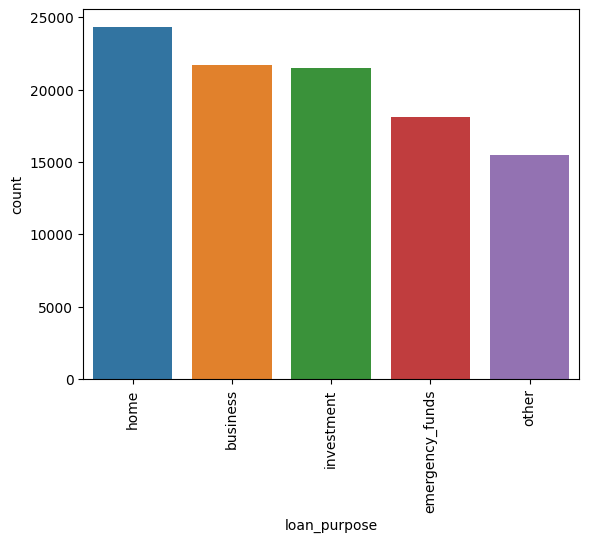

In [97]:
ax=sns.countplot(x='loan_purpose',data=df,order=df['loan_purpose'].value_counts()[:7].index)
ax.tick_params(axis='x',rotation=90)
df['loan_purpose'].describe()

The most common loan purpose is home which makes sense as it is essential for living and requires a lot of money. Businessman and investors are more likely to take a loan than people who need emergency funds. Lastly, there are very few people who take a loan for other purposes.

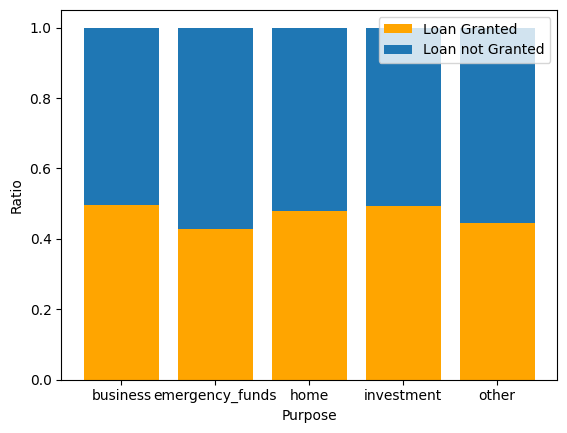

loan_purpose
business           0.496292
emergency_funds    0.428556
home               0.477667
investment         0.493530
other              0.445756
dtype: float64

In [109]:
grouped = df.groupby(['loan_purpose', 'loan_granted'])['loan_granted'].count().unstack()
total_loans = grouped.sum(axis=1)
granted = grouped[1] / total_loans
notgranted = grouped[0] / total_loans
fig, ax = plt.subplots()
ax.bar(granted.index, granted, label='Loan Granted', color='orange')
ax.bar(notgranted.index, notgranted, bottom=granted, label='Loan not Granted')
ax.set_ylabel('Ratio')
ax.set_xlabel('Purpose')
ax.legend()
plt.show()
granted

From this stacked bar chart, we can see that the percentage of loans granted for each purpose is between the range of 42 - 50%. This means that the purpose of the loan does not have a significant impact on the loan decision. However, we can see that the percentage of loans granted for business and investment purposes is slightly higher than the other purposes. Which makes sense as these people are more likely to pay back the loan.

#### Employment Status

<Axes: >

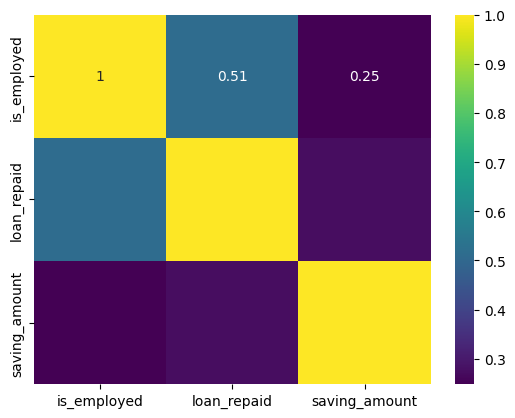

In [99]:
sns.heatmap(df[['is_employed','loan_repaid', 'saving_amount']].corr(),annot=True, cmap='viridis')


We can see that is_employed and loan_granted are positively correlated with each other. This means that people who are employed are more likely to get a loan. This makes sense as they have a stable source of income and are more likely to pay back the loan. Similarly, we can see that saving_amount and loan_repaid are also positively correlated with each other with a correlation coefficient around 0.3 (idk what is wrong with my matplotlib it isnt showing all the labels). This means that people who have more savings are more likely to pay back the loan.

#### Annual Salary and Saving Amount

<Axes: xlabel='yearly_salary', ylabel='saving_amount'>

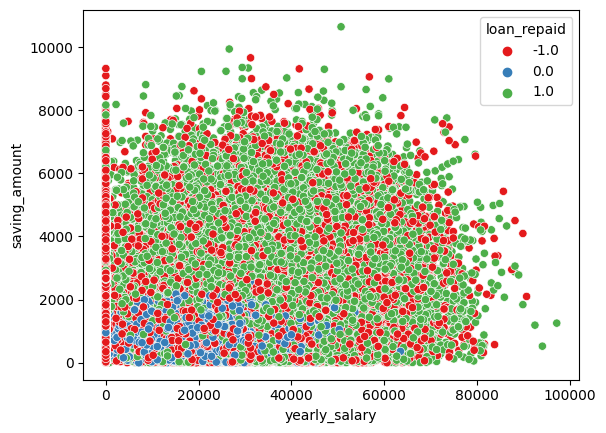

In [100]:
sns.scatterplot(x='yearly_salary', y='saving_amount', data=df, hue='loan_repaid', palette='Set1')

Here we see some interesting results. We can see that the people who have a higher annual salary are more likely payback the loan. This makes sense as they have a higher income and are more likely to pay back the loan, we see that beyond 40k annual salary, the percentage of people who haven't paid back the loan is very low. Similarly, we can see that the people who have a higher saving amount are more likely payback the loan. This makes sense as they have a higher savings and are more likely to pay back the loan, we see that beyond 20k saving amount, almost everyone has paid back the loan regardless of their annual salary.

The red dots represent the people who were not granted the loan. We can see that the people who were not granted the loan are quite spread out and there is no clear pattern.

#### Loan Repaid

In [101]:
#using groupby to see how many loans were approved and how many were repaid
gp = df.groupby(['loan_repaid']).size().reset_index(name='count')
gp

,loan_repaid,count
0,-1.0,53446
1,0.0,16948
2,1.0,30706


We can see that the number of people who have repaid the loan is significantly higher than the number of people who have not repaid the loan. This makes sense as the bank would not give a loan to someone who is not likely to pay it back.

#### Correlations

In [107]:
corr = df[['is_first_loan', 'age', 'loan_granted', 'saving_amount']].corr()
corr

,is_first_loan,age,loan_granted,saving_amount
is_first_loan,1.000000,-0.002353,-0.004398,0.005650
age,-0.002353,1.000000,0.002431,-0.005321
loan_granted,-0.004398,0.002431,1.000000,0.150180
saving_amount,0.005650,-0.005321,0.150180,1.000000


We see that is_first_loan and age are slightly negatively correlated with each other. This makes sense as the older you are, the more likely you are to have taken a loan before. Similarly, we see that is_first_loan and saving_amount are slightly positively correlated with each other, which is logically sound as someone who has higher savings is not likely to take a loan because they don't need it.

We also see that loan_granted and is_first_loan are slightly negatively correlated with each other. This makes sense as someone who has taken a loan before is more likely to get a loan again. Similarly, we see that loan_granted and saving_amount are positively correlated with each other, which makes sense as someone who has higher savings is more likely to be granted a loan.

### Classification

In [58]:
model_df = df

Using the rules above (If loan is granted and is not repaid then -1 (loan decision was wrong and caused loss), if loan is granted and is get repaid then 1 (loan decision was right and counts towards gain)), and if loan is not granted then 0 (no gain or loss), we can create a new column called decision which will be our target column.

In [59]:
model_df['decision'] = 0
model_df.loc[model_df['loan_repaid'] == 1, 'decision'] = 1
model_df.loc[model_df['loan_repaid'] == 0, 'decision'] = -1
model_df.head(15)

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid,decision
0,289774,1,-1.0,-1.0,8000,0.49,3285,1073,0,0,47,3,business,2012-01-31,0,-1.0,0
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1,investment,2012-11-02,0,-1.0,0
2,135565,1,-1.0,-1.0,6900,0.82,2085,3422,1,24500,38,8,other,2012-07-16,1,1.0,1
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1,investment,2012-06-05,0,-1.0,0
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1,emergency_funds,2012-11-28,0,-1.0,0
5,423171,1,-1.0,-1.0,6100,0.53,6163,5298,1,29500,24,1,other,2012-11-07,1,1.0,1
6,568977,1,-1.0,-1.0,600,0.89,305,1456,0,0,50,2,emergency_funds,2012-10-12,0,-1.0,0
7,200139,1,-1.0,-1.0,4000,0.57,602,2757,1,31700,36,8,business,2012-09-19,1,0.0,-1
8,991294,0,1.0,0.0,7000,0.52,2575,2917,1,58900,33,3,emergency_funds,2012-12-04,1,1.0,1
9,875332,0,1.0,0.0,4300,0.83,722,892,1,5400,32,7,business,2012-01-20,1,1.0,1


Dropping the date column as it is not needed for classification. Also, dropping the loan_granted and loan_repaid columns as we will be using the decision column instead.

In [60]:
model_df.drop(['date', 'loan_granted', 'loan_repaid'], axis=1,inplace=True)

Using one hot encoding to convert the categorical columns into numerical columns.

In [61]:
model_df = pd.get_dummies(model_df, columns=['loan_purpose'], drop_first=True)

#### Splitting the data into training and testing data.

In [69]:
X = model_df.drop(['decision'], axis=1)
Y = model_df['decision']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Tuning the number of estimators for the random forest classifier.

nEstimator = 1, Training Accuracy = 86.11%, Testing Accuracy = 62.17%, difference = 23.94%
nEstimator = 10, Training Accuracy = 98.76%, Testing Accuracy = 70.44%, difference = 28.32%
nEstimator = 19, Training Accuracy = 99.53%, Testing Accuracy = 72.38%, difference = 27.15%
nEstimator = 28, Training Accuracy = 99.84%, Testing Accuracy = 72.93%, difference = 26.90%
nEstimator = 37, Training Accuracy = 99.92%, Testing Accuracy = 73.38%, difference = 26.53%
nEstimator = 46, Training Accuracy = 99.97%, Testing Accuracy = 73.45%, difference = 26.52%
nEstimator = 55, Training Accuracy = 99.98%, Testing Accuracy = 73.72%, difference = 26.25%
nEstimator = 64, Training Accuracy = 100.00%, Testing Accuracy = 73.67%, difference = 26.32%
nEstimator = 73, Training Accuracy = 100.00%, Testing Accuracy = 73.71%, difference = 26.28%
nEstimator = 82, Training Accuracy = 100.00%, Testing Accuracy = 73.80%, difference = 26.20%
nEstimator = 91, Training Accuracy = 100.00%, Testing Accuracy = 73.77%, diffe

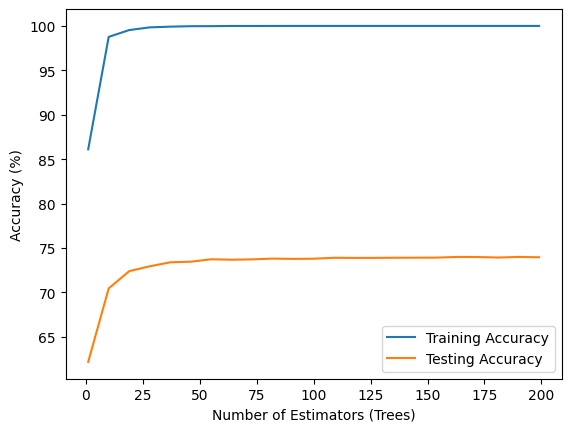

In [68]:
train_accuracies = []
test_accuracies = []
numTrees = range(1, 200, 9)
for i in numTrees:
    forest = RandomForestClassifier(n_estimators=i, random_state=99)
    model = forest.fit(x_train, y_train)
    
    train_pred = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred) * 100
    
    test_pred = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_pred) * 100
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f'nEstimator = {i}, Training Accuracy = {train_acc:.2f}%, Testing Accuracy = {test_acc:.2f}%, difference = {train_acc - test_acc:.2f}%')

plt.plot(numTrees, train_accuracies, label='Training Accuracy')
plt.plot(numTrees, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

We see that the training accuracy converges to 100% at around 55 estimators and the testing accuracy converges to 74%.

We will use 100 estimators for our random forest classifier.

We see that the training accuracy 

In [75]:
# Training the model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [76]:
# Predicting the model
y_pred = model.predict(x_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.7403066271018793
Precision: 0.7658109877136492
Recall: 0.7403066271018793
F1 score: 0.7421221954536577


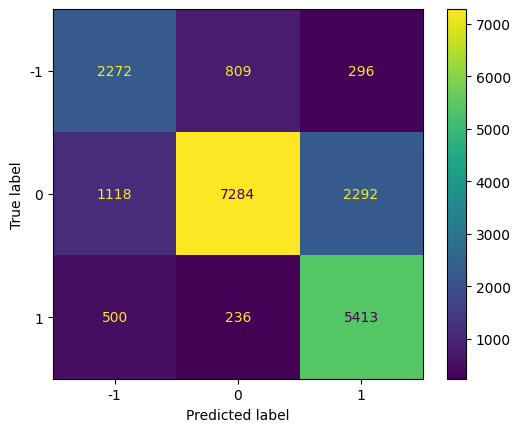

In [77]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Plotting the confusion matrix helps us visualize the performance of our model. We can see that the model is performing well for true positives (decision = 1 and prediction = 1), however it is not performing well for true negatives (decision = -1 and prediction = -1). This means that the model is not able to predict the people who will not pay back the loan.

This could be because of the imbalance in the data. There are more people who have paid back the loan than people who have not paid back the loan. This means that the model is biased towards predicting that the loan will be paid back. As well as the fact that we added a new label 0 which means that the loan was not granted, which could be causing the model to be biased towards predicting that the loan will be paid back.

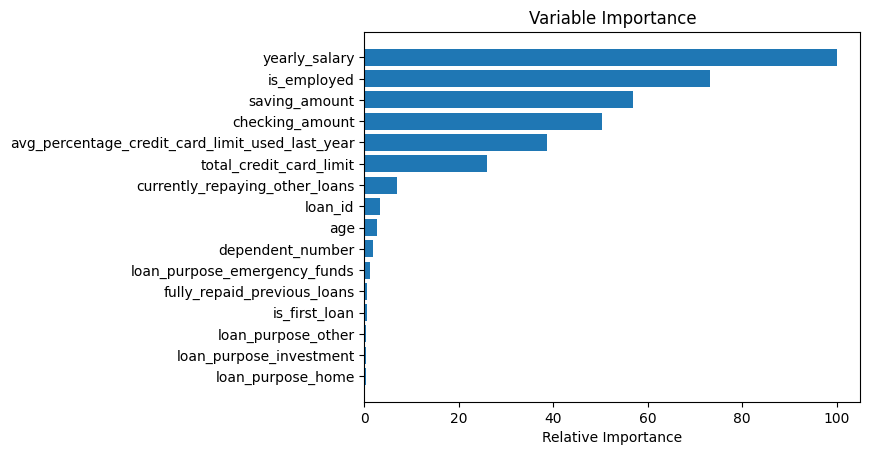

In [78]:
# Plotting the feature importance
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

We can see that the most important features are yearly_salary, is_employed, saving amount and checking amount. This makes sense as these features are correlated with the loan decision and in our EDA we saw that these features have a significant impact on the loan decision (loan_granted and loan_repaid). These also make sense as any bank would want to give a loan to someone who has a stable source of income and has savings in their bank account as they are more likely to pay back the loan.

As for the features fully_repaid_previous_loans and dependent_number, we can see that they have a very low importance. This is an interesting observation as we would think that these features would have a significant impact on the loan decision. However, this is not the case.

#### Dropping the rows where the loan was not granted just for the sake of perofrmance.

In [74]:
#Use the following code to merge two datasets
new_df = borrower_df.merge(loan_df, how='outer', on='loan_id')

In [79]:
new_df.dropna(inplace=True)

In [80]:
new_df['decision'] = new_df['loan_repaid'].apply(lambda x: 1 if x == 1 else -1)

In [81]:
new_df.drop(['date', 'loan_granted', 'loan_repaid'], axis=1,inplace=True)

In [82]:
new_df = pd.get_dummies(new_df, columns=['loan_purpose'], drop_first=True)

In [83]:
X = new_df.drop(['decision'], axis=1)
Y = new_df['decision']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [84]:
# Training the model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [85]:
# Predicting the model
y_pred = model.predict(x_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.925606343283582
Precision: 0.9263075810550755
Recall: 0.925606343283582
F1 score: 0.925848266493229


We can see that we can improve the performance of our model by dropping the rows where the loan was not granted. This is because the model is biased towards predicting that the loan will be paid back. As well as the fact that we added a new label 0 which means that the loan was not granted, which could be causing the model to be biased towards predicting that the loan will be paid back.

The accuracy of our model has increased from 74% to 93% by dropping the rows where the loan was not granted, which is a very significant improvement.

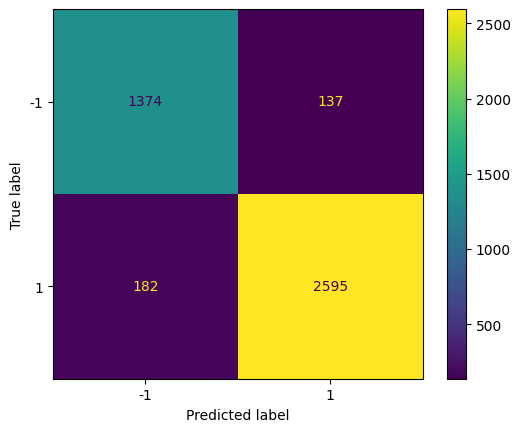

In [86]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

The confusion matrix also shows that the model is performing well for true positives (decision = 1 and prediction = 1) as well as true negatives (decision = -1 and prediction = -1). This means that the model is able to predict the people who will not pay back the loan.

In [110]:
new_df.shape

(21438, 17)

This performance improvement comes at a cost of losing almost 80% of our data, which is not ideal as it may fail to generalize well on unseen data.